Found 720 images belonging to 9 classes.
Found 180 images belonging to 9 classes.
Epoch 1/50
22/22 [==============================] - 82s 4s/step - loss: 2.2329 - acc: 0.1584 - val_loss: 1.9145 - val_acc: 0.2750
Epoch 2/50
22/22 [==============================] - 58s 3s/step - loss: 1.8371 - acc: 0.2209 - val_loss: 1.6510 - val_acc: 0.3000
Epoch 3/50
22/22 [==============================] - 51s 2s/step - loss: 1.6419 - acc: 0.2922 - val_loss: 1.5375 - val_acc: 0.2875
Epoch 4/50
22/22 [==============================] - 52s 2s/step - loss: 1.6360 - acc: 0.2514 - val_loss: 1.4499 - val_acc: 0.3187
Epoch 5/50
22/22 [==============================] - 51s 2s/step - loss: 1.5552 - acc: 0.3023 - val_loss: 1.4337 - val_acc: 0.3750
Epoch 6/50
22/22 [==============================] - 51s 2s/step - loss: 1.4934 - acc: 0.3314 - val_loss: 1.3944 - val_acc: 0.3562
Epoch 7/50
22/22 [==============================] - 50s 2s/step - loss: 1.4875 - acc: 0.3314 - val_loss: 1.3180 - val_acc: 0.3625
Epoch 8/

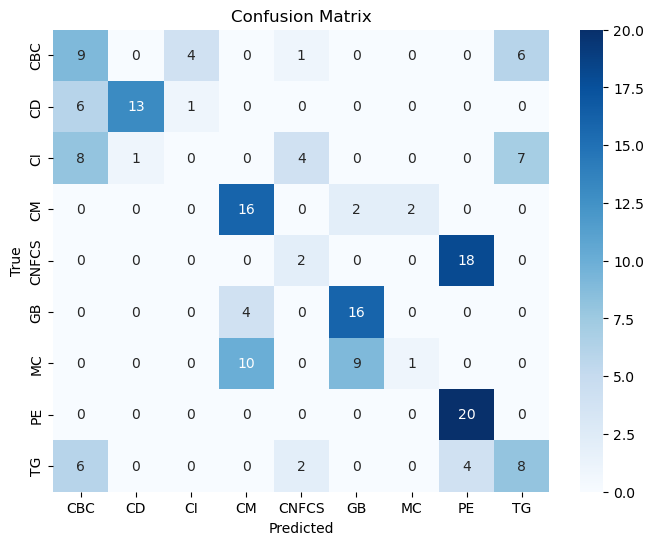

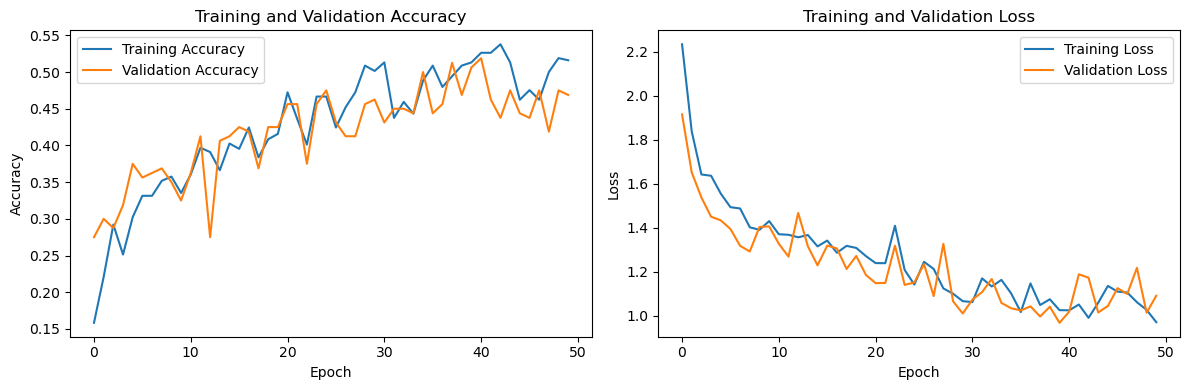

In [2]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_dir = r"C:\Users\mttvi\OneDrive\Área de Trabalho\DB2\Feijaotex"
image_size = (256, 192)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 192, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(9, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size
)

test_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

predictions = model.predict(test_generator)
y_true = test_generator.classes
y_pred = np.argmax(predictions, axis=1)

accuracy_percentage = np.sum(y_true == y_pred) / len(y_true) * 100
print(f"Acurácia em porcentagem: {accuracy_percentage:.2f}%")

cm = confusion_matrix(y_true, y_pred)

class_labels = list(train_generator.class_indices.keys())
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=class_labels))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
